# Postwork 7

 ## Nombre del Postwork: Procesamiento de Lenguaje Natural

### OBJETIVO 

- Aplicar los conceptos de Procesamiento de Lenguaje Natural aprendidos en esta sesión a nuestro proyecto

#### REQUISITOS 

- Tener un dataset limpio que contenga una columna con datos no estructurados.

> En caso de que tu dataset no contenga datos no estructurados, date una vuelta por [Kaggle](https://kaggle.com) y busca algún dataset apropiado. Lo que nos interesa en que practiques estas herramientas durante la clase para que puedas expresarle tus dudas a la experta.

#### DESARROLLO

Realiza los siguientes procedimientos en caso de que apliquen a tu dataset:

1. Utiliza patrones Regex para limpiar tus datos estructurados
2. Dado que debes de conocer bien tu dataset (excepto si es un nuevo dataset que buscaste para este Postwork), es probable que tengas una idea de las palabras que son relevantes para tu tema. Genera un objeto Text con la librería nltk y explora los contextos de las palabras que elegiste. Utiliza el método `similar` para obtener palabras que tengan contextos similares a las palabras originales. Puede que descubras nuevas palabras que tengan relevancia para tu proyecto.
3. Utiliza el objeto FreqDist de nltk para hacer análisis estadístico de tu dataset. Explora las palabras y los bigramas más comunes de tu dataset.
4. Realiza visualizaciones de tus conteos de frecuencias utilizando gráficas de barras.
5. Realiza visualizaciones de las distribuciones de frecuencias de las longitudes de las palabras o de las oraciones.
6. Realiza nubes de palabras para detectar los temas más importantes de tu conjunto de datos.
7. Haz un análisis de sentimientos de tu conjunto de datos, de preferencia utilizando una variable categórica para segmentar tus datos y poder comparar las distribuciones de polaridades entre cada segmento.

¡Mucha suerte!

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('punkt');
nltk.download('stopwords');


[nltk_data] Downloading package punkt to /home/alan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/alan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
df = pd.read_csv('https://raw.githubusercontent.com/LIZZETHGOMEZ/Data-Science-Fase-3-BEDU-Santander/Postwork-7/Data/Top_500_Songs.csv',encoding='latin-1')
df.head()

,title,description,appears on,artist,writers,producer,released,streak,position
0,Like a Rolling Stone,"""I wrote it. I didn't fail. It was straight,"" ...",Highway 61 Revisited (Columbia),Bob Dylan,Dylan,Tom Wilson,"July, 1965",12 weeks,No. 2
1,(I Can't Get No) Satisfaction',"""It's the riff heard round the world,"" says St...",Out of Our Heads (ABKCO),The Rolling Stones,"Mick Jagger, Keith Richards",Andrew Loog Oldham,"May, 1965",14 weeks,No. 1
2,Imagine,"John Lennon wrote ""Imagine,"" his greatest musi...",Imagine (Capitol/Apple),John Lennon,John Lennon,"Lennon, Phil Spector, Yoko Ono","October, 1971",9 weeks,No. 3
3,What's Going On,"""What's Going On"" is an exquisite plea for pea...",What's Going On (Tamla),Marvin Gaye,"Gaye, Renaldo Benson, Al Cleveland",Gaye,"Feb, 1971",13 weeks,No. 2
4,Respect,"Otis Redding wrote ""Respect"" and recorded it f...",I Never Loved a Man the Way I Love You (Atlantic),Aretha Franklin,Otis Redding,Jerry Wexler,"April, 1967",12 weeks,No. 1


Agrupamos por titulo y obtenemos solamente la columna de descripción de la canción

In [ ]:
grouped_by_title = df.groupby('title')['description'].last()

Se procede con una limpieza del texto:

In [ ]:
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')  
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.dropna()
grouped_by_title

Realizamos la tokenización y almacenamos las palabras en un objeto de texto

In [ ]:
tokenized = grouped_by_title.apply(nltk.word_tokenize)
all_words = tokenized.sum()
text = nltk.Text(all_words)

In [ ]:
text.concordance('world', lines=10)

In [ ]:
text.similar('world',num=30)

In [ ]:
text.similar('love',num=30)

In [ ]:
text.similar('said',num=30)


In [ ]:
text.common_contexts(['told', 'was'])

In [ ]:
text.collocations()

In [ ]:
print(f'Cantidad de palabras: {len(text)}')
print(f'Cantidad de palabras únicas: {len(set(text))}')
print(f'Riqueza léxica: {len(set(text)) / len(text):.3f}')


3 .

In [ ]:
freq_dist = nltk.FreqDist(all_words)
freq_dist.most_common(20)

In [ ]:
english_stop_words = stopwords.words('english')

all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

In [ ]:
freq_dist_no_stop_words.most_common(20)

In [ ]:
print(f'{(100 * freq_dist_no_stop_words["said"] / len(all_words_except_stop_words)):.3f}%')

In [ ]:
freq_dist_no_stop_words.plot(50, cumulative=True);


In [ ]:
# Palabras que sólo aparecen una sola vez
freq_dist_no_stop_words.hapaxes()[:20]

4 .

In [ ]:
freq_dist_no_stop_words.plot(20)

In [ ]:
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))
bigrams_most_common = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x=bigrams_most_common[:, 1], y=bigrams_most_common[:, 0], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 bigramas más comunes', pad=10)
ax.set_xlabel('Frecuencia')

In [ ]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_no_stop_words.most_common(20))))

# conversión a tipo númerico
most_common_20_cant = [int(word) for word in most_common_20[:,1]]

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(most_common_20[:, 0], most_common_20_cant, ax=ax, palette='flare');
ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Cantidad')
ax.tick_params(axis='x', rotation=75)

5 .

In [ ]:
len_words = [len(n) for n in all_words_except_stop_words]

sns.displot(len_words, binwidth=1,kde=False, color='r')
plt.title('Longitud de palabras');
plt.xlabel('cantidad de letras por palabra');
plt.ylabel('frecuencia');

6 .

In [ ]:
most_common_100 = np.array(list(map(lambda x: list(x), freq_dist_no_stop_words.most_common(100))))
most_common_100_word =[word for word in most_common_100[:,0]]

wordcloud = WordCloud(max_font_size=100,background_color='white').generate(' '.join(most_common_100_word))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

7 . Haz un análisis de sentimientos de tu conjunto de datos, de preferencia utilizando una variable categórica para segmentar tus datos y poder comparar las distribuciones de polaridades entre cada segmento

In [98]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/alan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/alan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [99]:
analizador = SentimentIntensityAnalyzer()

In [133]:
df1 = df.copy()

df1['description'] = df1['description'].str.lower()
df1['description'] = df1['description'].str.strip()
df1['description'] = df1['description'].str.replace('[^\w\s]', '')  
df1['description'] = df1['description'].str.replace('\\n', '')
df1['description'] = df1['description'].str.replace('\d', '')
df1['description'] = df1['description'].dropna()

/tmp/ipykernel_2533/2262152972.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['description'] = df1['description'].str.replace('[^\w\s]', '')
/tmp/ipykernel_2533/2262152972.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['description'] = df1['description'].str.replace('\\n', '')
/tmp/ipykernel_2533/2262152972.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['description'] = df1['description'].str.replace('\d', '')


Obteniendo el score sentimental por descripción:

In [117]:
def get_sentiment(x):
    scores = analizador.polarity_scores(x)
    return scores['compound']

df1['sentiment_score'] = df1.description.apply(get_sentiment)
df1['positive'] = df1.sentiment_score.apply(lambda x:x>= 0)


In [103]:
#Position column
# Eliminano texto, NaN y ''
df1['position'] = df1['position'].str.replace('\D','')
df1 = df1.dropna()
df1.drop(df1[df1['position'] == '']['position'].index, inplace=True)

#Convirtiendo a número
df1['position'] = df1['position'].astype(int)


/tmp/ipykernel_2533/2997727100.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['position'] = df1['position'].str.replace('\D','')


<AxesSubplot:xlabel='sentiment_score', ylabel='position'>

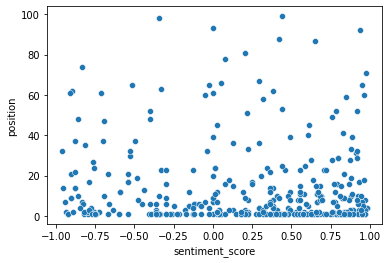

In [122]:
sns.scatterplot(data=df1,x='sentiment_score',y='position')

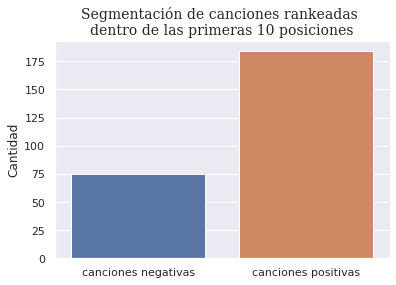

In [132]:
df1['count'] = 1
#Seleccionamos solo canciones que estuvieron dentro de las primeras 10 posiciones
df1_top10 = df1[df1['position'] <= 10]

#Graficamos
count = df1_top10.groupby('positive')['count'].sum()
sns.set_theme(style ='darkgrid');
sns.barplot(data=df1_top10, y = count , x = count.index)
plt.xticks([0,1], labels = ('canciones negativas', 'canciones positivas'));
plt.xlabel('')
plt.ylabel('Cantidad');
plt.title('Segmentación de canciones rankeadas \ndentro de las primeras 10 posiciones', size = 14, family = 'serif');